<a href="https://colab.research.google.com/github/fizyamat/ML/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Часть I: О теореме Байеса

###Описание

Введем обозначения:

g - виновен

b - редкая группа крови

k - это количество живущих в городе людей



###1

Из утверждения, что у убийцы редкая группа крови, которую имеет всего $1\%$ населения следует, что если подсудимый не виновен, то вероятность совпадения равна $1\%$:

\begin{equation}

p(b|\bar{g}) = 1\% = 0.01

\end{equation}

В первой части своего утверждения прокурор об этом и говорит, но из этого не следует что виновность подсудимого $99\%$:

\begin{equation}

p(\bar{g}|b) =  p(b|\bar{g})   \tag{вывод прокурора} 

\end{equation}

Данное утверждение не верно, об это говорит теорма Байеса:

\begin{equation}

p(\bar{g}|b) =  \frac{p(b|\bar{g}) * p(\bar{g})}{p(b)} = \frac{p(b|\bar{g}) * p(\bar{g})}{p(b|g)p(g) + p(b|\bar{g})p(\bar{g})} = 

\frac{0.01*(1 - \frac{1}{k})} {1*\frac{1}{k} + 0.01*(1 - \frac{1}{k})} \approx 0.9999 = 99,99\% \text{ при  k = }\ 10^{6}

\end{equation}

как видно из решения:

\begin{equation}

p(\bar{g}|b) \neq p(b|\bar{g})

\end{equation}

Следовательно вероятность, того что подсудимый виновен при условии, что кровь совпала равна:

\begin{equation}

p(g|b) = 1 - p(\bar{g}|b) = 1 - 0.9999 = 0.0001 = 0.01\%

\end{equation}

что сильно отличается от утверждения прокурора


###2


Утверждение адвоката состоит в том, что в городе проживает 1 000 000 человек, из них 10 000 имеют редкую группу крови, следовательно вероятность о которой говорит адвокат:

\begin{equation}
    
    \frac{p(g|b)}{p(\bar{g}|b)} = 
    
    \frac{p(b|g)*p(g)}{p(b|\bar{g})*p(\bar{g})} =  
    
    \frac{1 * 10^{-6}}{0.01 * (1 - 10^{-6})}
    \approx

    \frac{1}{10000} = 0.0001= 0.01\%
    
\end{equation}

А должен был оценить $p(g|b)$


###3

In [1]:
import matplotlib.pyplot as plt

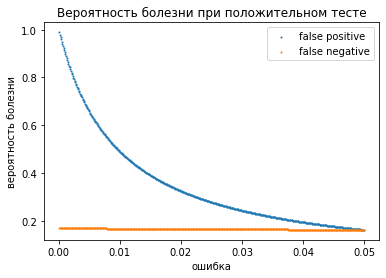

In [2]:
def true_positive_prob(false_positive, false_negative):  
    return 1 / (1 + 99 * (false_positive / (1 - false_negative)))

errors = [x / 10000 for x in range(1, 500)]
positive_probs = [true_positive_prob(error, .05) for error in errors]
negative_probs = [true_positive_prob(.05, error) for error in errors]

plt.scatter(errors, positive_probs, s = 1, label='false positive')
plt.scatter(errors, negative_probs, s = 1, label='false negative')

plt.xlabel('ошибка')
plt.ylabel('вероятность болезни')
plt.title('Вероятность болезни при положительном тесте')
plt.legend()
plt.show()


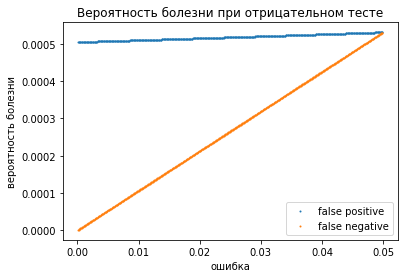

In [3]:
def false_positive_prob(false_positive, false_negative):  
    return 1 / (1 + 99 * (1 - false_positive) / (false_negative))

errors = [x / 10000 for x in range(1, 500)]
positive_probs = [false_positive_prob(error, .05) for error in errors]
negative_probs = [false_positive_prob(.05, error) for error in errors]

plt.scatter(errors, positive_probs, s = 1, label='false positive')
plt.scatter(errors, negative_probs, s = 1, label='false negative')

plt.xlabel('ошибка')
plt.ylabel('вероятность болезни')
plt.title('Вероятность болезни при отрицательном тесте')
plt.legend()
plt.show()

На графике "Вероятность болезни при положительном тесте" видно, точность определения болезни сильно возврастает только при уменьшении ошибки "false positive".

На графике "Вероятность болезни при отрицательном тесте" не заметно сильного увеличения точноси при изменнении как "false positive", так и "false negative" ошибок. 

Исходя из данных обоих графиков можно сделать вывод, что имеет смысл уменьшать ошибку "false positive". 

# Часть II: О линейной регрессии

In [4]:
!pip install scikit-learn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [6]:
covid_data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
covid_data = covid_data.loc[covid_data['location'] == 'Russia']
covid_data = covid_data.loc[covid_data['date'] > '2020-03-03']
covid_data['new_cases'].replace(.0, 1, inplace=True)
covid_data.sort_values(by='date', inplace=True)
covid_data['Id'] = np.arange(1, 1 + len(covid_data))

In [7]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Id
52923,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,0.0,0.021,0.000,0.001,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46414.0,0.318,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,1
52924,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.0,0.027,0.007,0.002,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4952.0,51366.0,0.352,0.034,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,2
52925,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,0.0,0.089,0.062,0.011,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4322.0,55688.0,0.382,0.030,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,3
52926,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,0.0,0.089,0.000,0.011,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4272.0,59960.0,0.411,0.029,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,4
52927,RUS,Europe,Russia,2020-03-08,17.0,4.0,2.143,NaN,NaN,0.0,0.116,0.027,0.015,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3231.0,63191.0,0.433,0.022,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,5


In [8]:
row_num = 50
train_data, test_data = covid_data[:row_num], covid_data[row_num:]

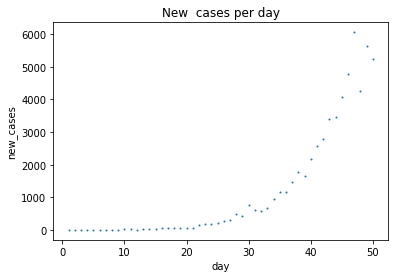

In [9]:
plt.scatter(train_data['Id'], train_data['new_cases'], s = 1)  

plt.xlabel('day')
plt.ylabel('new_cases')
plt.title('New  cases per day')

plt.show()

###a

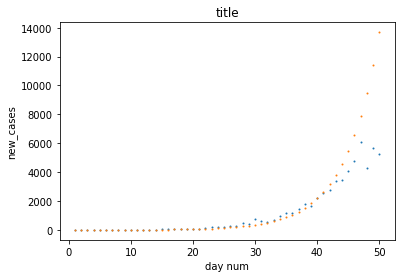

In [10]:
X_train, y_train = np.array(train_data['Id']).reshape(row_num, 1), np.array(train_data['new_cases']).reshape(row_num, 1)

def get_dispertion(X, y, k, b):

    count = len(X)
    y = np.log(y_train)

    A = y - X * k -np.ones((count, 1)) * b
    dispertion = (A.T @ A) / (count - 1) 

    return dispertion[0][0]

def get_trained_model(X_train, y_train):
    X = X_train
    y = np.log(y_train)

    linear_regression = LinearRegression(normalize=True)
    linear_regression.fit(X, y)
    
    return linear_regression 

model = get_trained_model(X_train, y_train)    
result = np.exp(model.predict(X_train))

plt.scatter(train_data['Id'], train_data['new_cases'], s = 1, label='positives')
plt.scatter(train_data['Id'], result, s = 1, label='positives')   

plt.xlabel('day num')
plt.ylabel('new_cases')
plt.title('title')

plt.show()


In [11]:
k = model.coef_[0][0]
b = model.intercept_[0]
dispertion = get_dispertion(X_train, y_train, k, b)

print(f'k = {k}')
print(f'b = {b}')
print(f'dispertion = {dispertion}')


k = 0.18269413690508055
b = 0.3893490366457675
dispertion = 0.3807078546709521
